****1)	Cree la variable “edad2” definida como edad2 (edad al cuadrado). Presente un histograma de la variable edad en un panel A, y a la par una distribución de kernels para los ocupados y desocupados en un panel B (esto es, son dos lineas de kernel en este segundo panel). Comente brevemente la distribución de edades en estos dos panels (3-4 oraciones).**** 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


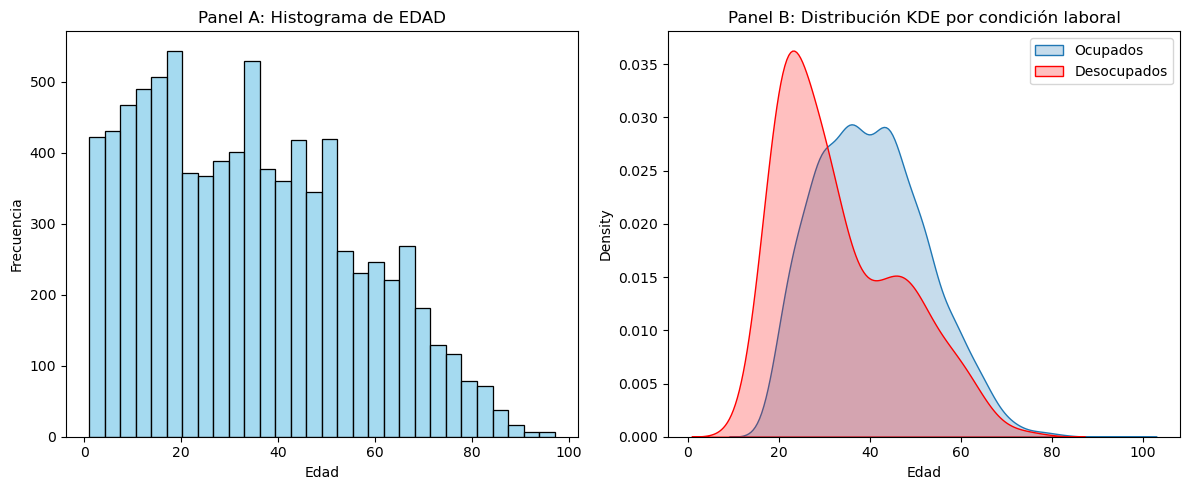

In [3]:

# 1) CARGAMOS NUESTRA BASE DE DATOS LIMPIA
df = pd.read_excel("BASE_TP3_limpio.xlsx")

# 2) CREAMOS LA NUEVA VARIABLE
df["edad2"] = df["CH06"] ** 2

# CREAMOS LAS FIGURAS EN DOS PANELES
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# PANEL A: HISTOGRAMA DE "EDAD" (COLUMNA CH06)
sns.histplot(df["CH06"].dropna(), bins=30, kde=False, ax=axes[0], color='skyblue')
axes[0].set_title("Panel A: Histograma de EDAD")
axes[0].set_xlabel("Edad")
axes[0].set_ylabel("Frecuencia")

# PANEL B: DISTRIBUCIÓN DE KERNELS POR ESTADO LABORAL
ocupado = df[df["ESTADO"] == 1]["CH06"]
desocupado = df[df["ESTADO"] == 2]["CH06"]

sns.kdeplot(ocupado.dropna(), label="Ocupados", ax=axes[1], fill=True)
sns.kdeplot(desocupado.dropna(), label="Desocupados", ax=axes[1], fill=True, color="red")
axes[1].set_title("Panel B: Distribución KDE por condición laboral")
axes[1].set_xlabel("Edad")
axes[1].legend()

plt.tight_layout()
plt.show()


****2)	Cree la variable educ definida como la cantidad de años de educación. Use inteligentemente las variables CH12, CH13 y CH14 para crearla. Por ejemplo, si dice que el nivel más alto de educación es “Secundario” (CH12), “Sí” finalizo este nivel (CH13)  y el ultimo año que aprobó (CH14) fue “sexto”, entonces puede asumir que tiene  educ=12, osea 12 años de educación formal. Presente una estadistica descriptiva (promedio, sd, min, p50, max) de dicha variable creada y comente****


In [13]:
#PRIMERO UNIFICAMOS VALORES PARA LAS COLUMNAS CH12, CH13 Y CH14

# Diccionario para mapear los valores textuales a numéricos según tu codificación
mapa_ch12 = {
    "Jardín/ Preescolar": 1,
    "Primario": 2,
    "EGB": 3,
    "Secundario": 4,
    "Polimodal": 5,
    "Terciario": 6,
    "Universitario": 7,
    "Posgrado Univ.": 8,
    "Educación especial (discapacitado)": 9
}

# Reemplazamos valores textuales por los códigos numéricos
df["CH12"] = df["CH12"].replace(mapa_ch12)

# Convertimos toda la columna a valores numéricos (si quedan strings sueltos)
df["CH12"] = pd.to_numeric(df["CH12"], errors="coerce")

In [15]:
# Diccionario para mapear valores textuales a numéricos en CH13
mapa_ch13 = {
    "Sí": 1,
    "Si": 1,
    "No": 2,
    "Ns/Nr": 3
}

# Reemplazamos valores textuales por códigos
df["CH13"] = df["CH13"].replace(mapa_ch13)

# Convertimos la columna a numérica
df["CH13"] = pd.to_numeric(df["CH13"], errors="coerce")

In [17]:
# Diccionario para mapear valores textuales en CH14 a numéricos
mapa_ch14 = {
    "Ninguno": 0,
    "Primero": 1,
    "Segundo": 2,
    "Tercero": 3,
    "Cuarto": 4,
    "Quinto": 5,
    "Sexto": 6,
    "Séptimo": 7,
    "Septimo": 7,
    "Octavo": 8,
    "Noveno": 9,
    "Educación especial": 98,
    "Ns/Nr": 99
}

# Reemplazamos valores textuales por códigos
df["CH14"] = df["CH14"].replace(mapa_ch14)

# Convertimos la columna a numérica
df["CH14"] = pd.to_numeric(df["CH14"], errors="coerce")

In [25]:
import numpy as np

# Crear una función que calcule los años de educación basados en los valores de CH12, CH13 y CH14
def calcular_educacion(row):
    # Asumimos años de educación según el nivel más alto de educación (CH12)
    if row['CH12'] == 1:  # Jardín/Preescolar
        return 2
    elif row['CH12'] == 2:  # Primario
        return 6
    elif row['CH12'] == 3:  # EGB
        return 9
    elif row['CH12'] == 4:  # Secundario
        if row['CH13'] == 1:  # Si finalizó el nivel
            return 12 if row['CH14'] >= 6 else row['CH14']
        else:
            return np.nan  # No finalizó
    elif row['CH12'] == 5:  # Polimodal
        if row['CH13'] == 1:  # Si finalizó el nivel
            return 13 if row['CH14'] >= 6 else row['CH14']
        else:
            return np.nan  # No finalizó
    elif row['CH12'] == 6:  # Terciario
        if row['CH13'] == 1:  # Si finalizó el nivel
            return 16 if row['CH14'] >= 6 else row['CH14']
        else:
            return np.nan  # No finalizó
    elif row['CH12'] == 7:  # Universitario
        if row['CH13'] == 1:  # Si finalizó el nivel
            return 18 if row['CH14'] >= 6 else row['CH14']
        else:
            return np.nan  # No finalizó
    elif row['CH12'] == 8:  # Posgrado Univ.
        return 20  # Si llegó a Posgrado, asumo 20 años de educación formal
    elif row['CH12'] == 9:  # Educación especial
        return np.nan  # Lo dejamos como NaN o un valor específico si es necesario
    else:
        return np.nan  # Si el valor no se corresponde con ningún nivel

# Aplicamos la función a cada fila para crear la nueva columna 'educ'
df['educ'] = df.apply(calcular_educacion, axis=1)

# Estadísticas descriptivas de la variable 'educ'
descripcion_educ = df['educ'].describe()
print(descripcion_educ)

count    2835.000000
mean        6.494533
std         2.191169
min         2.000000
25%         6.000000
50%         6.000000
75%         6.000000
max        20.000000
Name: educ, dtype: float64


In [ ]:
#PASAMOS EN LIMPIO

## count = 2835: Esto indica que tienes 2835 observaciones (filas) que tienen información válida en la columna educ.

## mean = 6.49: El promedio de años de educación formal en tu base de datos es aproximadamente 6.5 años.

## std = 2.19: La desviación estándar es 2.19, lo que sugiere que existe una cierta variabilidad en los años de educación. Algunos tienen menos años, otros tienen más.

## min = 2: El valor mínimo es 2, lo que probablemente corresponde a aquellos que tienen solo educación preescolar (Jardín/Preescolar).

## 25% = 6: El percentil 25 muestra que el 25% de la población tiene 6 años de educación formal o menos.

## 50% = 6 (mediana): La mediana también es 6, lo que significa que la mitad de las personas en tu muestra tiene 6 años de educación formal o menos.

## 75% = 6: El 75% de la población tiene 6 años de educación formal o menos.

## max = 20: El valor máximo es 20, lo que indica que algunas personas tienen 20 años de educación formal, posiblemente aquellos con posgrado universitario (según cómo definimos los años de educación).